In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Final_Project_Data.csv", header=1)

In [9]:
data.head()

,SeqId,SomaId,TargetFullName,Target,UniProt,EntrezGeneID,EntrezGeneSymbol,Organism,Avg_StdBeta_weighted_AD,Meta_p_weighted_AD,...,FTD_StdBeta_I,FTD_p_I,FTD_StdBeta_N,FTD_p_N,FTD_StdBeta_Q,FTD_p_Q,StdBeta_ALS,p_ALS,p_ALS_fdr,p_ALS_Bonf
0,10000-28,SL019233,Beta-crystallin B2,CRBB2,P43320,1415,CRYBB2,Human,0.020411,0.105892,...,0.006329,0.928649,0.053975,0.250799,-0.026774,0.490741,-0.075116,0.201204,0.842753,1.0
1,10001-7,SL002564,RAF proto-oncogene serine/threonine-protein ki...,c-Raf,P04049,5894,RAF1,Human,-0.018095,0.863149,...,0.017468,0.804333,-0.017854,0.708493,0.040186,0.295369,-0.052058,0.369734,0.941329,1.0
2,10003-15,SL019245,Zinc finger protein 41,ZNF41,P51814,7592,ZNF41,Human,0.049706,0.000772,...,-0.051204,0.467474,0.022361,0.632494,0.000016,0.999663,0.015578,0.790375,0.995112,1.0
3,10006-25,SL019228,ETS domain-containing protein Elk-1,ELK1,P19419,2002,ELK1,Human,0.028990,0.002776,...,-0.008240,0.907607,-0.020170,0.672558,0.038028,0.325208,0.088028,0.129374,0.782800,1.0
4,10008-43,SL019234,Guanylyl cyclase-activating protein 1,GUC1A,P43080,2978,GUCA1A,Human,-0.014837,0.151340,...,-0.002621,0.970121,-0.048115,0.310151,-0.060230,0.118636,0.030428,0.603799,0.990152,1.0


In [26]:
#total num proteins
len(data["SeqId"].unique())

7289

In [3]:
# proteins highly expressed in AD (upregulated)
upregulated = data[(data["Avg_StdBeta_weighted_AD"] > 0) & (data["Meta_p_weighted_AD"] < 0.05)]
upregulated.head()
print(len(upregulated))

2161


Text(0.5, 1.0, 'Distribution of Significantly Upregulated Proteins in AD')

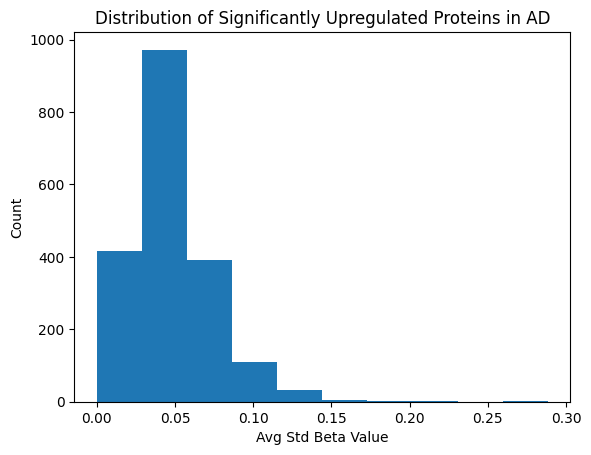

In [37]:
# plot distribution of upregulated proteins
plt.hist(upregulated["Avg_StdBeta_weighted_AD"])
plt.xlabel("Avg Std Beta Value")
plt.ylabel("Count")
plt.title("Distribution of Significantly Upregulated Proteins in AD")

In [4]:
# proteins downregulated in AD
downregulated = data[(data["Avg_StdBeta_weighted_AD"] < 0) & (data["Meta_p_weighted_AD"] < 0.05)]
downregulated.head()
print(len(downregulated))

2830


Text(0.5, 1.0, 'Distribution of Significantly Downregulated Proteins in AD')

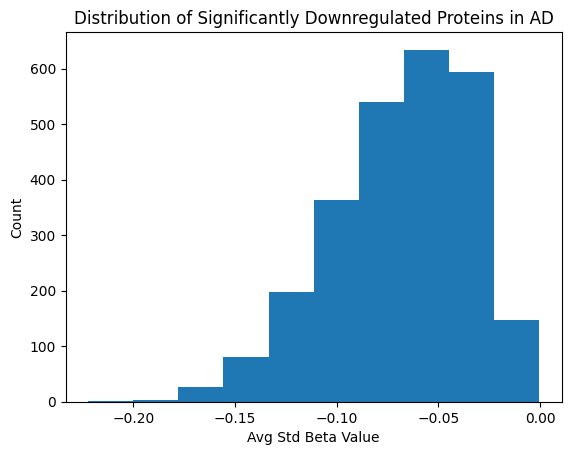

In [39]:
# plot distribution of downregulated proteins
plt.hist(downregulated["Avg_StdBeta_weighted_AD"])
plt.xlabel("Avg Std Beta Value")
plt.ylabel("Count")
plt.title("Distribution of Significantly Downregulated Proteins in AD")

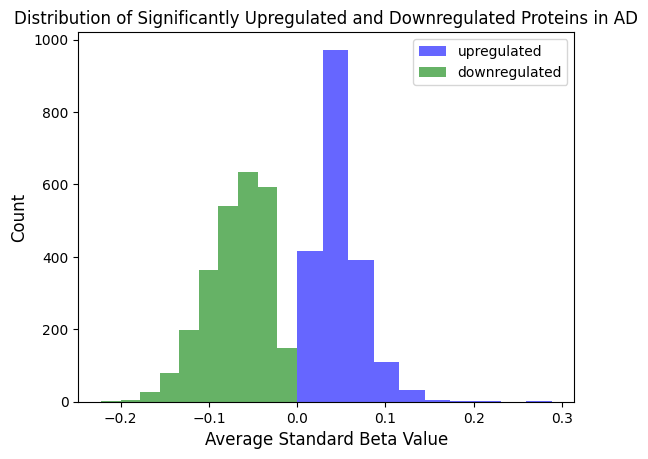

In [40]:
# putting the two distributions together
plt.figure()
plt.hist(upregulated["Avg_StdBeta_weighted_AD"], label = "upregulated", color='blue', alpha=0.6)
plt.hist(downregulated["Avg_StdBeta_weighted_AD"], label = "downregulated", color='green', alpha=0.6)
plt.xlabel("Average Standard Beta Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Significantly Upregulated and Downregulated Proteins in AD")
plt.legend()
plt.show()

In [5]:
# number of proteins not significantly changed in AD
unchanged = data[(data["Avg_StdBeta_weighted_AD"] == 0) | (data["Meta_p_weighted_AD"] > 0.05)]
len(unchanged)

2298

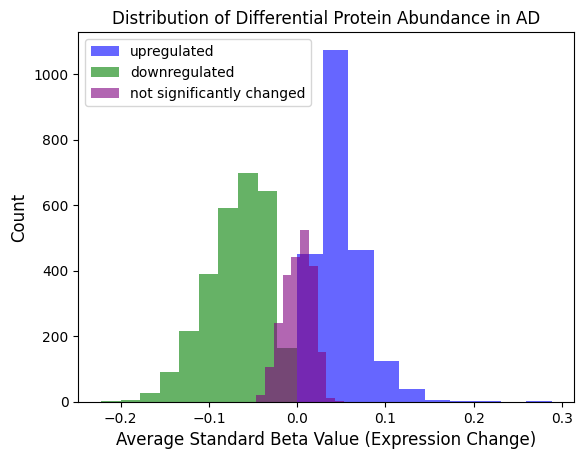

In [6]:
# all 3 dist
plt.figure()
plt.hist(upregulated["Avg_StdBeta_weighted_AD"], label = "upregulated", color='blue', alpha=0.6)
plt.hist(downregulated["Avg_StdBeta_weighted_AD"], label = "downregulated", color='green', alpha=0.6)
plt.hist(unchanged["Avg_StdBeta_weighted_AD"], label="not significantly changed", color='purple', alpha=0.6)
plt.xlabel("Average Standard Beta Value (Expression Change)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Differential Protein Abundance in AD")
plt.legend()
plt.show()

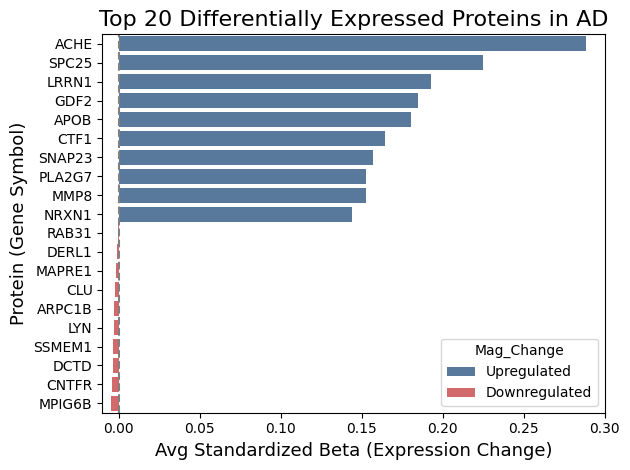

In [8]:
# see top 10 most upregulated, downregulated
# issue - can't see downreg very well - switch to separate plots

# sort dataframes in descending order of avg beta
top_10_upreg = upregulated.sort_values(by="Avg_StdBeta_weighted_AD", ascending=False).head(10)
top_10_downreg = downregulated.sort_values(by="Avg_StdBeta_weighted_AD", ascending=False).head(10)

# concat dfs
top_20_changed = pd.concat([top_10_upreg, top_10_downreg], ignore_index=True)

top_20_changed['Mag_Change'] = top_20_changed['Avg_StdBeta_weighted_AD'].apply(
    lambda x: 'Upregulated' if x > 0 else 'Downregulated'
)

palette = {'Upregulated': '#4c78a8', 'Downregulated': '#e45759'} # Blue for Up, Red for Down

# barplot
plt.figure()
sns.barplot(
    data=top_20_changed.sort_values(by='Avg_StdBeta_weighted_AD', ascending=False),
    x='Avg_StdBeta_weighted_AD',
    y='EntrezGeneSymbol',
    hue='Mag_Change', 
    palette=palette,
    dodge=False 
)

# Add the central baseline
plt.axvline(x=0, color='gray', linestyle='--')

# Set labels and title
plt.title('Top 20 Differentially Expressed Proteins in AD', fontsize=16)
plt.xlabel('Avg Standardized Beta (Expression Change)', fontsize=13)
plt.ylabel('Protein (Gene Symbol)', fontsize=13)

# Place the legend outside the chart for clarity
plt.legend(title='Mag_Change', loc='lower right')

plt.xlim([-0.01, 0.3])

# Finalize the layout
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Top 10 Significantly Downregulated Proteins AD')

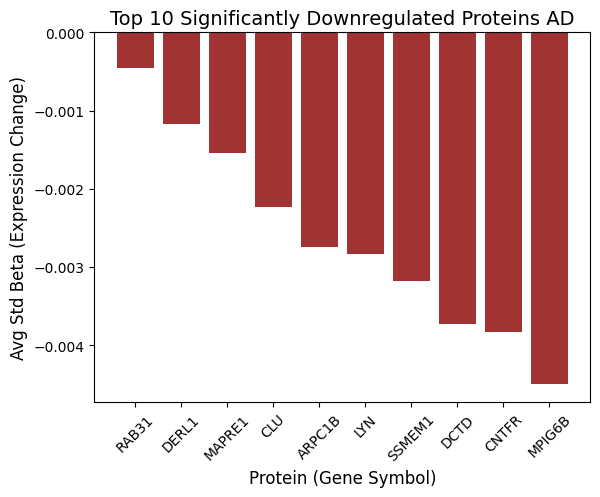

In [9]:
plt.bar(top_10_downreg["EntrezGeneSymbol"], top_10_downreg["Avg_StdBeta_weighted_AD"], color='darkred', alpha=0.8)
plt.tick_params(axis='x', labelrotation=45) 
plt.xlabel("Protein (Gene Symbol)", fontsize=12)
plt.ylabel("Avg Std Beta (Expression Change)", fontsize=12)
plt.title("Top 10 Significantly Downregulated Proteins AD", fontsize=14)

Text(0.5, 1.0, 'Top 10 Significantly Upregulated Proteins AD')

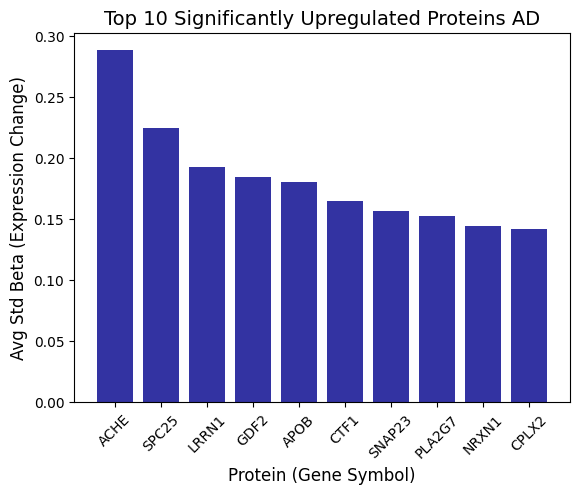

In [45]:
plt.bar(top_10_upreg["EntrezGeneSymbol"], top_10_upreg["Avg_StdBeta_weighted_AD"], color='darkblue', alpha=0.8)
plt.tick_params(axis='x', labelrotation=45) 
plt.xlabel("Protein (Gene Symbol)", fontsize=12)
plt.ylabel("Avg Std Beta (Expression Change)", fontsize=12)
plt.title("Top 10 Significantly Upregulated Proteins AD", fontsize=14)

In [4]:
data.columns

Index(['SeqId', 'SomaId', 'TargetFullName', 'Target', 'UniProt',
       'EntrezGeneID', 'EntrezGeneSymbol', 'Organism',
       'Avg_StdBeta_weighted_AD', 'Meta_p_weighted_AD', 'Meta_pval_FDR_AD',
       'Meta_pval_Bonf_AD', 'Sig_pos_AD', 'Sig_neg_AD', 'max_sites_AD',
       'AD_StdBeta_A', 'AD_p_A', 'AD_StdBeta_C', 'AD_p_C', 'AD_StdBeta_D',
       'AD_p_D', 'AD_StdBeta_E', 'AD_p_E', 'AD_StdBeta_F', 'AD_p_F',
       'AD_StdBeta_I', 'AD_p_I', 'AD_StdBeta_J', 'AD_p_J', 'AD_StdBeta_L',
       'AD_p_L', 'AD_StdBeta_G', 'AD_p_G', 'AD_StdBeta_R', 'AD_p_R',
       'Avg_StdBeta_weighted_PD', 'Meta_p_weighted_PD', 'Meta_pval_FDR_PD',
       'Meta_pval_Bonf_PD', 'Sig_pos_PD', 'Sig_neg_PD', 'max_sites_PD',
       'PD_StdBeta_C', 'PD_p_C', 'PD_StdBeta_F', 'PD_p_F', 'PD_StdBeta_J',
       'PD_p_J', 'PD_StdBeta_L', 'PD_p_L', 'PD_StdBeta_Q', 'PD_p_Q',
       'PD_StdBeta_R', 'PD_p_R', 'PD_StdBeta_T', 'PD_p_T',
       'Avg_StdBeta_weighted_FTD', 'Meta_p_weighted_FTD', 'Meta_pval_FDR_FTD',
       'Meta_p

In [13]:
upregulated_PD = data[(data["Avg_StdBeta_weighted_PD"] > 0) & (data["Meta_p_weighted_PD"] < 0.05)]
downregulated_PD = data[(data["Avg_StdBeta_weighted_PD"] < 0) & (data["Meta_p_weighted_PD"] < 0.05)]
unchanged_PD = data[(data["Avg_StdBeta_weighted_PD"] == 0) | (data["Meta_p_weighted_PD"] > 0.05)]
print(len(upregulated_PD))

2312


In [16]:
upregulated_FTD = data[(data["Avg_StdBeta_weighted_FTD"] > 0) & (data["Meta_p_weighted_FTD"] < 0.05)]
downregulated_FTD = data[(data["Avg_StdBeta_weighted_FTD"] < 0) & (data["Meta_p_weighted_FTD"] < 0.05)]
unchanged_FTD = data[(data["Avg_StdBeta_weighted_FTD"] == 0) | (data["Meta_p_weighted_FTD"] > 0.05)]
print(len(downregulated_FTD))

427


In [19]:
upregulated_ALS = data[(data["StdBeta_ALS"] > 0) & (data["p_ALS"] < 0.05)]
downregulated_ALS = data[(data["StdBeta_ALS"] < 0) & (data["p_ALS"] < 0.05)]
unchanged_ALS = data[(data["StdBeta_ALS"] == 0) | (data["p_ALS"] > 0.05)]
print(len(unchanged_ALS))

6699


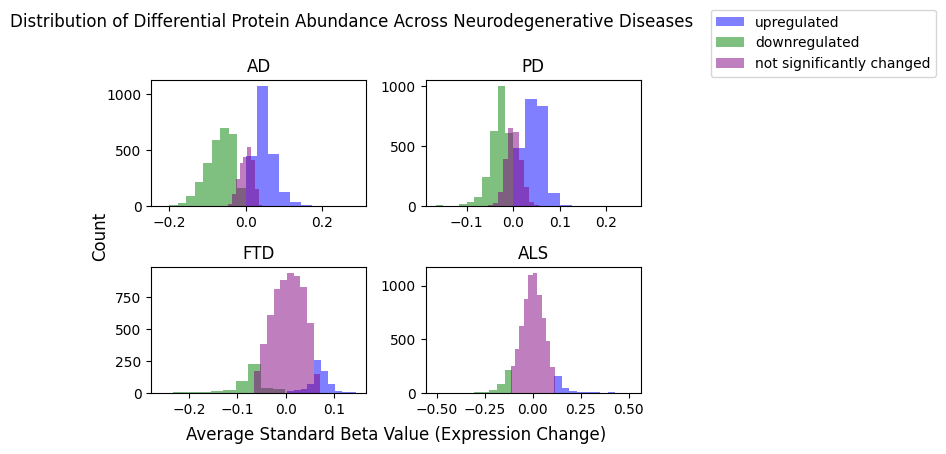

In [20]:
# final figures

# histograms
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
axs[0].hist(upregulated["Avg_StdBeta_weighted_AD"], label = "upregulated", color='blue', alpha=0.5)
axs[0].hist(downregulated["Avg_StdBeta_weighted_AD"], label = "downregulated", color='green', alpha=0.5)
axs[0].hist(unchanged["Avg_StdBeta_weighted_AD"], label="not significantly changed", color='purple', alpha=0.5)
axs[0].set_title("AD", fontsize=12)

axs[1].hist(upregulated_PD["Avg_StdBeta_weighted_PD"], color='blue', alpha=0.5)
axs[1].hist(downregulated_PD["Avg_StdBeta_weighted_PD"], color='green', alpha=0.5)
axs[1].hist(unchanged_PD["Avg_StdBeta_weighted_PD"], color='purple', alpha=0.5)
axs[1].set_title("PD", fontsize=12)

axs[2].hist(upregulated_FTD["Avg_StdBeta_weighted_FTD"], color='blue', alpha=0.5)
axs[2].hist(downregulated_FTD["Avg_StdBeta_weighted_FTD"], color='green', alpha=0.5)
axs[2].hist(unchanged_FTD["Avg_StdBeta_weighted_FTD"], color='purple', alpha=0.5)
axs[2].set_title("FTD", fontsize=12)

axs[3].hist(upregulated_ALS["StdBeta_ALS"], color='blue', alpha=0.5)
axs[3].hist(downregulated_ALS["StdBeta_ALS"], color='green', alpha=0.5)
axs[3].hist(unchanged_ALS["StdBeta_ALS"], color='purple', alpha=0.5)
axs[3].set_title("ALS", fontsize=12)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel("Average Standard Beta Value (Expression Change)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.suptitle("Distribution of Differential Protein Abundance Across Neurodegenerative Diseases", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.legend(loc='upper left', bbox_to_anchor=(1.05, 01.0))
fig.tight_layout() 


In [21]:
top_10_upreg_AD = upregulated.sort_values(by="Avg_StdBeta_weighted_AD", ascending=False).head(10)
top_10_downreg_AD = downregulated.sort_values(by="Avg_StdBeta_weighted_AD", ascending=False).head(10)

top_10_upreg_PD = upregulated_PD.sort_values(by="Avg_StdBeta_weighted_PD", ascending=False).head(10)
top_10_downreg_PD = downregulated_PD.sort_values(by="Avg_StdBeta_weighted_PD", ascending=False).head(10)

top_10_upreg_FTD = upregulated_FTD.sort_values(by="Avg_StdBeta_weighted_FTD", ascending=False).head(10)
top_10_downreg_FTD = downregulated_FTD.sort_values(by="Avg_StdBeta_weighted_FTD", ascending=False).head(10)

top_10_upreg_ALS = upregulated_ALS.sort_values(by="StdBeta_ALS", ascending=False).head(10)
top_10_downreg_ALS = downregulated_ALS.sort_values(by="StdBeta_ALS", ascending=False).head(10)

In [105]:
top_10_downreg_PD["Avg_StdBeta_weighted_PD"]

1725   -0.000040
7075   -0.000042
6312   -0.000071
3334   -0.000074
324    -0.000178
6908   -0.000197
5799   -0.000212
6060   -0.000395
873    -0.000405
1877   -0.000487
Name: Avg_StdBeta_weighted_PD, dtype: float64

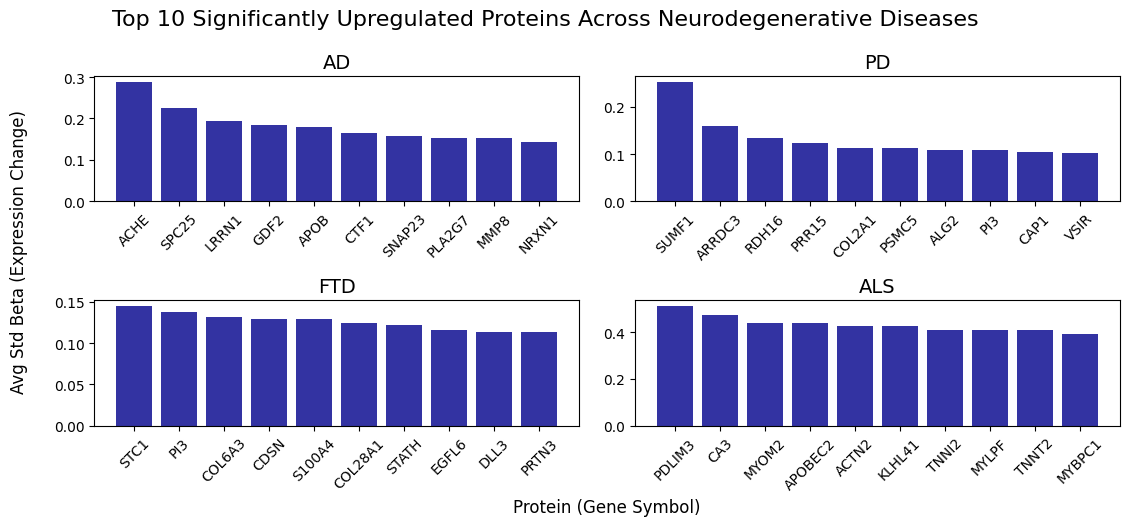

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 6))
axs = axs.ravel()
axs[0].bar(top_10_upreg_AD["EntrezGeneSymbol"], top_10_upreg_AD["Avg_StdBeta_weighted_AD"], color='darkblue', alpha=0.8)
axs[0].set_title("AD", fontsize=14)
axs[0].tick_params(axis='x', labelrotation=45) 

axs[1].bar(top_10_upreg_PD["EntrezGeneSymbol"], top_10_upreg_PD["Avg_StdBeta_weighted_PD"], color='darkblue', alpha=0.8)
axs[1].set_title("PD", fontsize=14)
axs[1].tick_params(axis='x', labelrotation=45) 

axs[2].bar(top_10_upreg_FTD["EntrezGeneSymbol"], top_10_upreg_FTD["Avg_StdBeta_weighted_FTD"], color='darkblue', alpha=0.8)
axs[2].set_title("FTD", fontsize=14)
axs[2].tick_params(axis='x', labelrotation=45) 

axs[3].bar(top_10_upreg_ALS["EntrezGeneSymbol"], top_10_upreg_ALS["StdBeta_ALS"], color='darkblue', alpha=0.8)
axs[3].set_title("ALS", fontsize=14)
axs[3].tick_params(axis='x', labelrotation=45) 

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)


plt.xlabel("Protein (Gene Symbol)", fontsize=12, labelpad=35)
plt.ylabel("Avg Std Beta (Expression Change)", fontsize=12, labelpad=25)
plt.suptitle("Top 10 Significantly Upregulated Proteins Across Neurodegenerative Diseases", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
fig.tight_layout() 


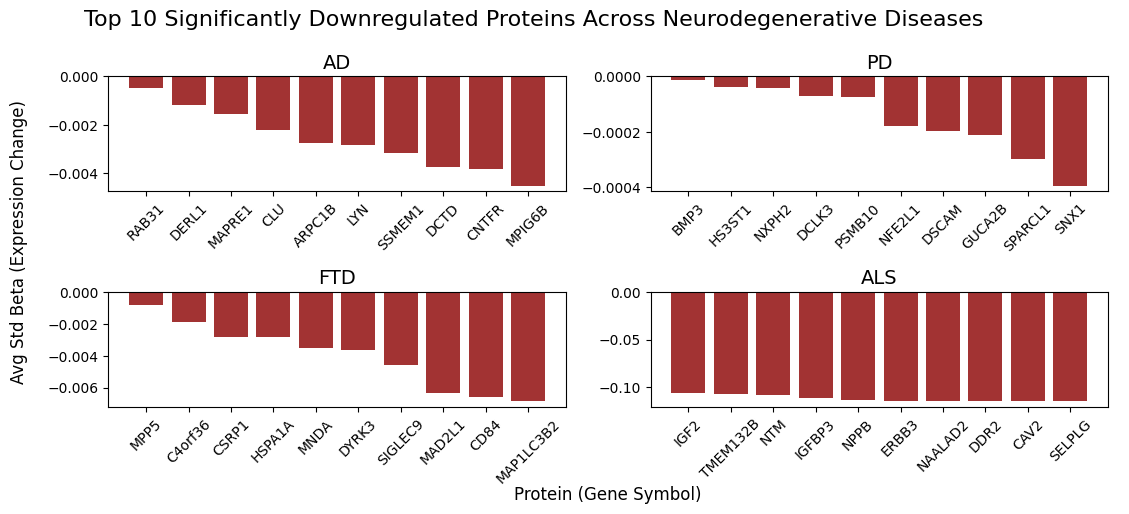

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 6))
axs = axs.ravel()
axs[0].bar(top_10_downreg_AD["EntrezGeneSymbol"], top_10_downreg_AD["Avg_StdBeta_weighted_AD"], color='darkred', alpha=0.8)
axs[0].set_title("AD", fontsize=14)
axs[0].tick_params(axis='x', labelrotation=45) 

axs[1].bar(top_10_downreg_PD["EntrezGeneSymbol"], top_10_downreg_PD["Avg_StdBeta_weighted_PD"], color='darkred', alpha=0.8)
axs[1].set_title("PD", fontsize=14)
axs[1].tick_params(axis='x', labelrotation=45) 

axs[2].bar(top_10_downreg_FTD["EntrezGeneSymbol"], top_10_downreg_FTD["Avg_StdBeta_weighted_FTD"], color='darkred', alpha=0.8)
axs[2].set_title("FTD", fontsize=14)
axs[2].tick_params(axis='x', labelrotation=45) 

axs[3].bar(top_10_downreg_ALS["EntrezGeneSymbol"], top_10_downreg_ALS["StdBeta_ALS"], color='darkred', alpha=0.8)
axs[3].set_title("ALS", fontsize=14)
axs[3].tick_params(axis='x', labelrotation=45) 

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)


plt.xlabel("Protein (Gene Symbol)", fontsize=12, labelpad=40)
plt.ylabel("Avg Std Beta (Expression Change)", fontsize=12, labelpad=35)
plt.suptitle("Top 10 Significantly Downregulated Proteins Across Neurodegenerative Diseases", fontsize=16)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
fig.tight_layout() 